In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df_country = pd.read_csv('../data/asylum-claims-by-country.csv')
df_country

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Pakistan,2151,4005,4867,4576,3976,3365,3774,3193,2625,2617,1572,1287,3167,5904,10542
1,Afghanistan,1843,1529,1242,1456,1753,2852,3115,1962,2103,2165,1575,3192,11358,9710,8508
2,Iran,2224,3051,3162,2967,2499,3716,4837,3094,4003,5490,4224,10522,10007,7842,8099
3,Bangladesh,501,671,1169,1246,919,1320,2256,2004,1463,1375,895,1081,4522,5097,7225
4,Syria,160,508,1289,2020,2353,2794,1569,786,921,1390,1772,3968,4857,3930,6680
5,India,610,615,1195,1111,922,1324,2054,1821,1685,1953,1067,1216,3612,5682,5312
6,Vietnam,467,347,416,466,400,620,822,1154,1278,1610,1018,1889,1075,2469,5259
7,Eritrea,772,827,768,1431,3291,3756,1265,1127,2208,1937,2641,5079,3519,4013,5053
8,Sudan,643,793,740,834,1615,3018,1445,1842,1786,1785,2183,2419,3397,3564,4833
9,Iraq,496,377,423,450,911,2648,3734,3356,3660,4008,3328,7796,6800,4255,3469


In [100]:
df_country = df_country.transpose()
df_country.columns = df_country.iloc[0].replace('Country', 'Year')
df_country = df_country.drop('Country')

<Axes: >

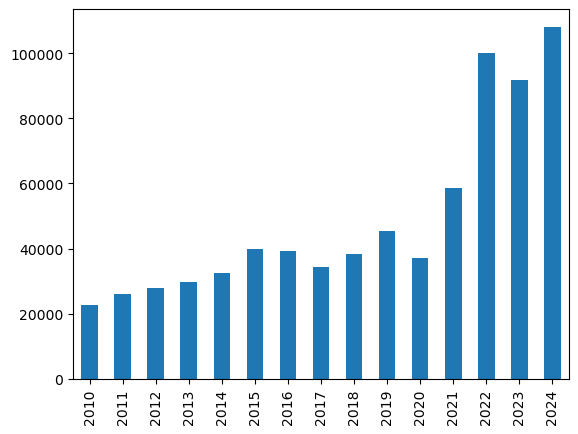

In [86]:
df_country['Total'].plot(kind='bar')

Notes:
1. Asylum claims see a slight drop after Brexit (2016) but continue to rise afterwards
2. Asylum claims also drop during 2020 - likely due to COVID
3. Post COVID (2022) asylum claims see a drastic rise

In [87]:
df_country = df_country.drop('Total', axis=1)

In [92]:
countries = ['Albania', 'Afghanistan', 'Iran', 'Iraq', 'Syria', 'Bangladesh', 'India', 'Eritrea', 'Sudan', 'Pakistan']

<Axes: >

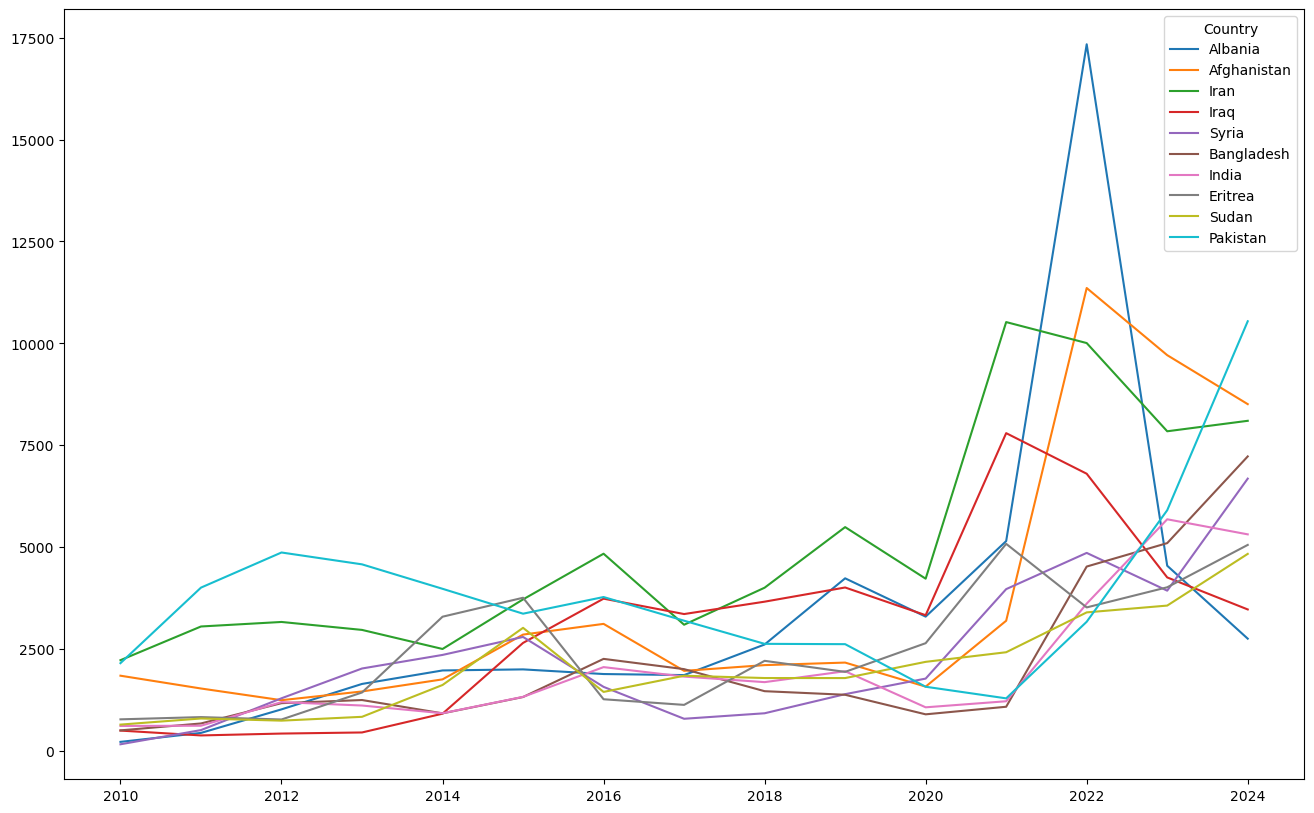

In [93]:
df_country[countries].plot(kind='line', figsize=(16, 10))

Notes:
1. All of the selected countries have seen a rise in asylum claims
2. The UK saw a drastic rise in Albanian asylum claims in 2022
3. In 2024 the largest country and fastest rising country for asylum claims is Pakistan

In [94]:
df_wait = pd.read_csv('../data/asylum-waiting-periods.csv')
df_wait

,Year,Awaiting initial decision,Less than 3 months,3 to 6 months,6 to 12 months,More than 12 months
0,2010,5978,2131,430,415,3002
1,2011,6800,3059,1087,754,1900
2,2012,9871,3573,1857,1875,2566
3,2013,13628,4633,2746,2470,3779
4,2014,17067,5720,2920,2861,5566
5,2015,18111,9564,4921,1569,2057
6,2016,21475,6983,5667,4016,4809
7,2017,22234,7011,4857,3105,7261
8,2018,27256,8485,6558,4463,7750
9,2019,40032,9618,7851,11298,11265


In [112]:
import matplotlib.patches as mpatches

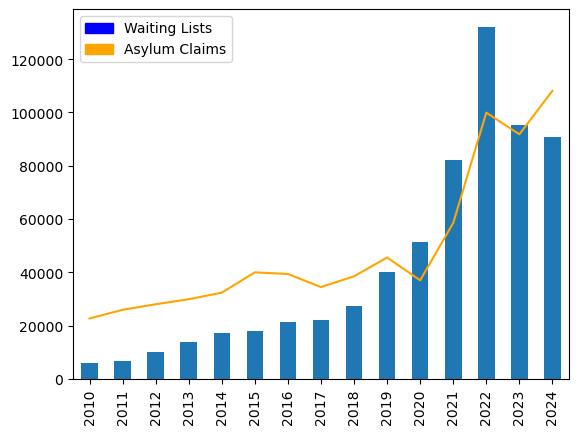

In [113]:
df_country['Total'].plot(kind='line', color='orange')
df_wait['Awaiting initial decision'].plot(kind='bar')
plt.xticks(np.arange(15), 
           labels=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
           rotation=90)
blue_patch = mpatches.Patch(color='blue', label='Waiting Lists')
orange_patch = mpatches.Patch(color='orange', label='Asylum Claims')
plt.legend(handles=[blue_patch, orange_patch])
plt.show()

Notes:
1. Before 2020 waiting lists were consistently below total asylum claims
2. During and after 2020 (COVID) waiting lists exceeded actual claims - likely that the asylum system was not equipped to handle the COVID backlog
3. In recent years (2023-24) waiting lists have reduced, now lower than total claims

In [115]:
df_wait_types = df_wait[['Year', 'Less than 3 months', '3 to 6 months', '6 to 12 months', 'More than 12 months']]
df_wait_types

,Year,Less than 3 months,3 to 6 months,6 to 12 months,More than 12 months
0,2010,2131,430,415,3002
1,2011,3059,1087,754,1900
2,2012,3573,1857,1875,2566
3,2013,4633,2746,2470,3779
4,2014,5720,2920,2861,5566
5,2015,9564,4921,1569,2057
6,2016,6983,5667,4016,4809
7,2017,7011,4857,3105,7261
8,2018,8485,6558,4463,7750
9,2019,9618,7851,11298,11265


<Axes: xlabel='Year'>

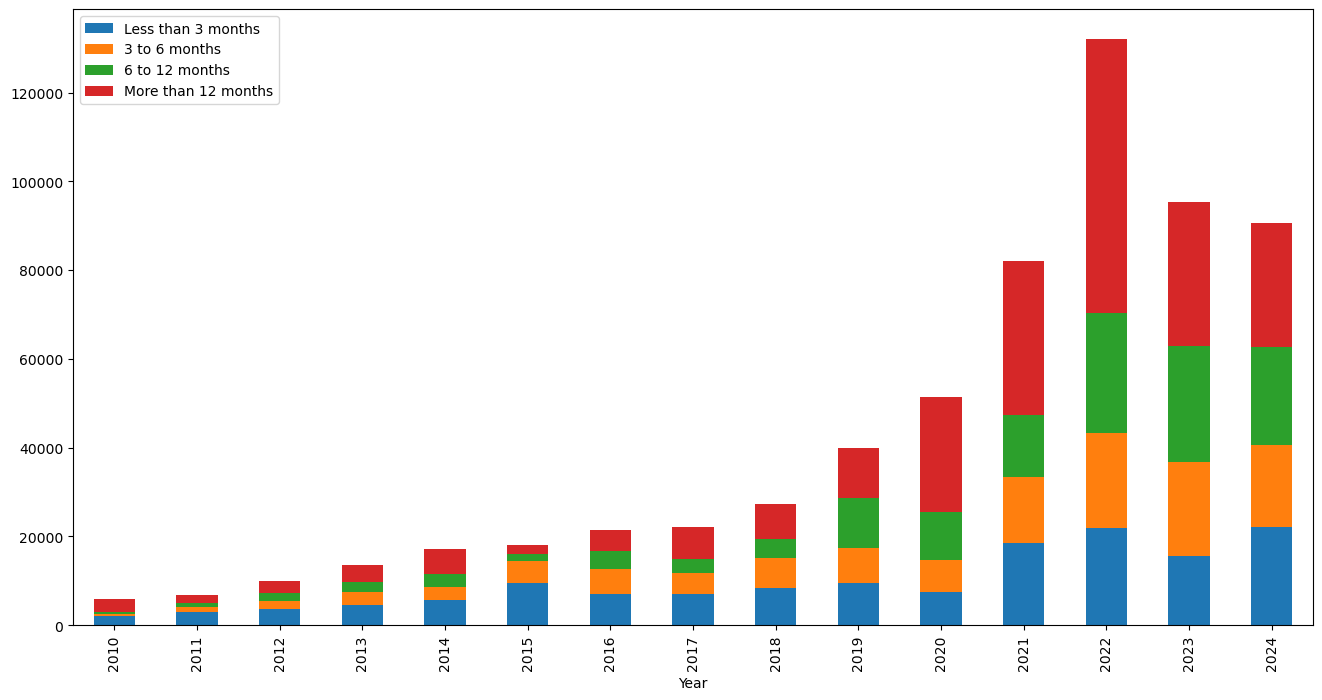

In [121]:
df_wait_types.plot(kind='bar', stacked=True, x='Year', figsize=(16,8))

Notes:
1. As asylum waiting lists spike in 2021-22, the main driver seems to be a backlog of people waiting more than 12 months for an initial decision
2. The influx seems to start in 2019 as by 2020 the proportion of people waiting for more than 12 months rises significantly